In [1]:
# model 套件
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PowerTransformer
import math
import warnings
warnings.filterwarnings('ignore')


# Second Preprocessing

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [3]:
# 處理 data 套件
import numpy as np
import pandas as pd

In [83]:
# let column can show all
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [84]:
df = pd.read_csv('Data/BayesianRidge_Pre_5/Input_A3_013.csv')
# df1 = pd.read_csv('Input_C_057.csv')
# df2 = pd.read_csv('Input_C_050.csv')

In [85]:
title = ['Input_A1_013','Input_A6_014','Input_A1_014','Input_A2_013','Input_A6_013']
# title = ['Input_A1_013','Input_A6_014','Input_A1_014','Input_A2_013','Input_A6_013']

In [86]:
# 直接執行轉換拉到最下面會發現 Wraninig
for col in title: # Predict 不做轉換
    if abs(df[col].skew()) >= 0.7: # 取偏態絕對值大於 0.5的項
        print(col)
        pt = PowerTransformer() # PowerTransformer 預設為 Yeo-Johson 轉換可轉正負數，不同於另一種 Box-Cox 只能用於正數
        d = pt.fit_transform(df[col].values.reshape(-1, 1)).flatten()
        df[col]=d

Input_A2_013


In [87]:
X = df[title]
scaler = RobustScaler()
df[title] = scaler.fit_transform(X)
y = df['Predict']

In [88]:
def pMSE(ans,predict):
    pmse = math.sqrt(sum(pow((ans - predict)/ans*100,2)/len(ans)))
    return pmse

In [89]:
def pNumber(ans,predict,num):
    return sum(abs((ans-predict)/ans*100) < num)

# Split data

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LassoCV

In [91]:
lasso = LassoCV(alphas=[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30],random_state = 42)
lasso.fit(X_train, np.sqrt(y_train))
alpha = lasso.alpha_
print("first best alpha:", alpha)
lasso = LassoCV(alphas=[0.00004, 0.00008, 0.0001, 0.0003, 0.0006],random_state = 42)
lasso.fit(X_train, np.sqrt(y_train))
alpha = lasso.alpha_
print("second best alpha:", alpha)
lasso = LassoCV(alphas=[0.0001 + i/100000 for i in range(1, 20)], random_state = 42)
lasso.fit(X_train, np.sqrt(y_train))
alpha = lasso.alpha_
print("final best alpha:", alpha)

first best alpha: 1e-05
second best alpha: 4e-05
final best alpha: 0.00011


In [92]:
y_pred = lasso.predict(X_test)

In [93]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test,pow(y_pred,2)))

R2 score: 0.0394


In [94]:
print("Percentage mse score: %.2f"
      % pMSE(y_test,pow(y_pred,2)))

Percentage mse score: 47.32


In [95]:
print("Number lower than error: %d"
      % pNumber(y_test, pow(y_pred,2), 15))

Number lower than error: 51


In [96]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.065691


In [97]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - pow(y_pred,2))/y_test*100).describe(percentiles = p)

count    105.000000
mean      30.989106
std       35.934686
min        3.354339
10%        6.399105
20%       13.871384
30%       13.871384
40%       13.871384
50%       27.002442
60%       29.192924
70%       29.192924
80%       29.192924
90%       53.859927
max      158.385848
Name: Predict, dtype: float64

In [98]:
lasso.coef_

array([0.        , 0.        , 0.        , 0.00423601, 0.        ])

# Linear regresssion

In [99]:
# 建立一個線性回歸模型
regr = LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(X_train, np.sqrt(y_train))

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(X_test)

In [100]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.6f"
      % mean_squared_error(y_test, pow(y_pred,2)))

Mean squared error: 0.000002


In [101]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, pow(y_pred,2))))

Root mean squared error: 0.001287


In [102]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test,pow(y_pred,2)))

R2 score: 0.2507


In [103]:
print("Percentage mse score: %.2f"
      % pMSE(y_test, pow(y_pred,2)))

Percentage mse score: 37.38


In [106]:
# y_test : len 103
print("Number lower than error: %d"   
      % pNumber(y_test, pow(y_pred,2), 15))

Number lower than error: 55


In [105]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - pow(y_pred,2))/y_test*100).describe(percentiles = p)

count    105.000000
mean      23.692725
std       29.049768
min        0.371371
10%        1.318930
20%        3.522823
30%        6.449721
40%        9.613308
50%       14.344185
60%       17.641426
70%       26.308661
80%       38.394294
90%       54.078734
max      152.173839
Name: Predict, dtype: float64

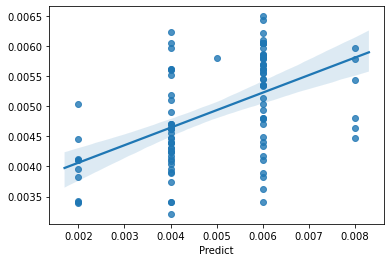

In [107]:
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline
sb.regplot(y_test, pow(y_pred,2))

In [108]:
# p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.
# If p-value <= alpha (0.05) : Reject H0 => need Normally distributed
# If p-value > alpha (0.05) : Accept H0 
from statsmodels.stats.diagnostic import normal_ad
normal_ad(y_test - pow(y_pred,2))

(1.0343989406608074, 0.00970732147198436)

# XGBoost regression

In [109]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold
from scipy.stats import skew


# 先調 booster / n_estimators

In [110]:
#for tuning parameters
parameters_for_testing = {
    'booster':['gbtree','gblinear','dart'],
    'n_estimators':range(10,201,10),
}

other_params = {'learning_rate': 0.1, 'n_estimators': 90, 'max_depth': 5, 'min_child_weight': 1, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    3.2s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    3.2s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1821s.) Setting batch_size=2.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    3.2s
[Parallel(n_jobs=6)]: Done  39 tasks      | elapsed:    3.3s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0903s.) Setting batch_size=8.
[Parallel(n_jobs=6)]: Batch computation too fast (0.1361s.) Setting batch_size=22.
[Parallel(n_jobs=6)]: Done  67 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done  93 out of 180 | elapsed:    3.5s remaining:    3.3s


best params
{'booster': 'gbtree', 'n_estimators': 60}
best score
0.1017485575001275


[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    5.4s finished


# 調 max_depth / min_child_weight

In [111]:
#for tuning parameters
parameters_for_testing = {
    'max_depth': [1,2,3, 4, 5, 6, 7, 8, 9, 10], 
    'min_child_weight': [1, 2, 3, 4, 5, 6]
}

other_params = {'booster':'gbtree','learning_rate': 0.1, 'n_estimators': 60, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0239s.) Setting batch_size=16.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


best params
{'max_depth': 1, 'min_child_weight': 1}
best score
0.2246396644116078


[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.4s finished


# 調 gamma

In [112]:
#for tuning parameters
parameters_for_testing = {
    'gamma': [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}

other_params = {'booster':'gbtree','learning_rate': 0.1, 'n_estimators': 60, 'max_depth': 1, 'min_child_weight': 1, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
best params
{'gamma': 0}
best score
0.2246396644116078


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0219s.) Setting batch_size=18.
[Parallel(n_jobs=6)]: Done   4 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=6)]: Done   7 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  21 out of  21 | elapsed:    0.0s finished


# 調 subsample / colsample_bytree

In [113]:
#for tuning parameters
parameters_for_testing = {
    'subsample': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

other_params = {'booster':'gbtree','learning_rate': 0.1, 'n_estimators': 60, 'max_depth': 1, 'min_child_weight': 1, 'seed': 42,
 'reg_alpha': 0, 'reg_lambda': 1, 'gamma':0}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0130s.) Setting batch_size=30.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


best params
{'colsample_bytree': 0.2, 'subsample': 0.4}
best score
0.2562630086364781


[Parallel(n_jobs=6)]: Done 192 out of 192 | elapsed:    0.4s finished


# reg_alpha / reg_lambda

In [114]:
#for tuning parameters
parameters_for_testing = {
    'reg_alpha': [0,0.05, 0.1, 0.5 , 1, 2, 3], 'reg_lambda': [0.05, 0.1, 0.5 , 1, 2, 3]
}

other_params = {'booster':'gbtree','learning_rate': 0.1, 'n_estimators': 60, 'max_depth': 1, 'min_child_weight': 1, 'seed': 42,
 'gamma':0,'subsample':0.4,'colsample_bytree': 0.2}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0239s.) Setting batch_size=16.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  11 out of 126 | elapsed:    0.0s remaining:    1.4s


best params
{'reg_alpha': 0, 'reg_lambda': 0.5}
best score
0.2574705401064607


[Parallel(n_jobs=6)]: Done 126 out of 126 | elapsed:    0.3s finished


# learning_rate

In [115]:
#for tuning parameters
parameters_for_testing = {
   'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]
}

other_params = {'booster':'gbtree', 'n_estimators':60, 'max_depth': 1, 'min_child_weight': 1, 'seed': 42,
 'gamma':0,'subsample':0.4,'colsample_bytree': 0.2,'reg_alpha': 0, 'reg_lambda': 0.5}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
best params
{'learning_rate': 0.1}
best score
0.2574705401064607


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0229s.) Setting batch_size=16.
[Parallel(n_jobs=6)]: Done   4 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   6 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   8 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  12 out of  15 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  15 out of  15 | elapsed:    0.0s finished


In [116]:
best_xgb_model = XGBRegressor(
              learning_rate = 0.1,
              booster = 'gbtree', 
              n_estimators = 60, 
              max_depth = 1, 
              min_child_weight = 1,
              seed = 42,
              gamma = 0,
              subsample = 0.4,
              colsample_bytree = 0.2,
              reg_alpha =  0,
              reg_lambda = 0.5)

best_xgb_model.fit(X_train,np.sqrt(y_train))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=1,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=60, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=0.5, scale_pos_weight=1, seed=42, subsample=0.4,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
y_pred = best_xgb_model.predict(X_test)

In [118]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test,pow(y_pred,2)))

R2 score: 0.2686


In [119]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test,pow(y_pred,2)))

Percentage rmse score: 39.97


In [120]:
print("Number lower than error: %d"
      % pNumber(y_test, pow(y_pred,2), 15))

Number lower than error: 48


In [121]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test,pow(y_pred,2))))

Root mean squared error: 0.001271


In [122]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - pow(y_pred,2))/y_test*100).describe(percentiles = p)

count    105.000000
mean      25.341108
std       31.061046
min        0.627765
10%        2.496690
20%        3.502187
30%        7.503846
40%       12.513993
50%       16.758776
60%       19.959887
70%       24.948809
80%       32.916185
90%       53.745036
max      150.222231
Name: Predict, dtype: float64

In [123]:
# the score function displays the accuracy of the model which translates to how well the model 
# can accurately predict for a new datapoint.
print("XGBoost regression score: %.4f"
      % best_xgb_model.score(X_train,np.sqrt(y_train)))

XGBoost regression score: 0.3079


# DecisionTree

In [124]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(
            criterion ='mse', 
            random_state = 42
)

In [125]:
param_grid = {'max_depth': range(1,10,1),
              'min_samples_split': range(2,16,2)}

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 63 candidates, totalling 189 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1007s.) Setting batch_size=2.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0439s.) Setting batch_size=18.


best params
{'max_depth': 3, 'min_samples_split': 8}
best score
0.1327445164203255


[Parallel(n_jobs=6)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 189 out of 189 | elapsed:    0.2s finished


In [126]:
 param_grid = {
              "min_samples_leaf": range(1,10,1),
              "max_leaf_nodes": range(2,10,1)
              }
    
clf = DecisionTreeRegressor(
            criterion ='mse', 
            max_depth = 3,
            min_samples_split = 8,
            random_state = 42
)

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0329s.) Setting batch_size=12.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0973s.) Setting batch_size=48.


best params
{'max_leaf_nodes': 5, 'min_samples_leaf': 1}
best score
0.15897960959723037


[Parallel(n_jobs=6)]: Done 216 out of 216 | elapsed:    0.2s finished


In [127]:
clf = DecisionTreeRegressor(
            criterion ='mse', 
            max_depth = 3,
            min_samples_split = 8,
            max_leaf_nodes = 5,
            min_samples_leaf = 1,
            random_state = 42
)
# 訓練模型
clf.fit(X_train,np.sqrt(y_train))

# 預測測試集
y_pred = clf.predict(X_test)

In [128]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.0876617  0.27905235 0.10814381 0.52514214 0.        ]


In [129]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, pow(y_pred,2)))

R2 score: 0.1700


In [130]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test,pow(y_pred,2)))

Percentage rmse score: 45.81


In [131]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test,pow(y_pred,2))))

Root mean squared error: 0.001354


In [132]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - pow(y_pred,2))/y_test*100).describe(percentiles = p)

count    105.000000
mean      26.747984
std       37.367877
min        0.180876
10%        3.367732
20%        3.367732
30%        3.367732
40%       12.729075
50%       17.780251
60%       23.329624
70%       27.069307
80%       34.430171
90%       45.496193
max      223.653811
Name: Predict, dtype: float64

#  RandomForest

In [133]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(
          criterion ='mse', 
          random_state = 42
)

In [134]:
param_grid = {
              'n_estimators': range(5,51,5),
              'max_depth': range(1,10,1),
              'min_samples_split': range(2,10,1)}

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0359s.) Setting batch_size=10.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  22 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1648s.) Setting batch_size=24.
[Parallel(n_jobs=6)]: Done  92 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 252 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 468 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 732 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done 996 tasks      | elapsed:    4.5s
[Parallel(n_jobs=6)]: Done 1308 tasks      | elapsed:    5.9s
[Parallel(n_jobs=6)]: Done 1620 tasks      | elapsed:    7.7s
[Parallel(n_jobs=6)]: Done 1932 out of 2160 | elapsed:    9.3s remaining:    1.0s


best params
{'max_depth': 3, 'min_samples_split': 9, 'n_estimators': 45}
best score
0.2487655984195983


[Parallel(n_jobs=6)]: Done 2160 out of 2160 | elapsed:   10.3s finished


In [135]:
 param_grid = {
              "min_samples_leaf": range(1,10,1),
              "max_leaf_nodes": range(2,15,1)
              }
    
clf = RandomForestRegressor(
            criterion ='mse', 
            n_estimators = 45,
            max_depth = 3,
            min_samples_split = 9,
            random_state = 42
)

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,np.sqrt(y_train))

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 117 candidates, totalling 351 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0559s.) Setting batch_size=6.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 114 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 234 tasks      | elapsed:    1.6s


best params
{'max_leaf_nodes': 4, 'min_samples_leaf': 1}
best score
0.2499387004860758


[Parallel(n_jobs=6)]: Done 351 out of 351 | elapsed:    2.4s finished


In [136]:
clf = RandomForestRegressor( 
            criterion ='mse', 
            n_estimators = 45,
            max_depth = 3,
            min_samples_split = 9,
            max_leaf_nodes = 4,
            min_samples_leaf =1,
            random_state = 42) 
#給予max_depth 可以避免過度擬和

# 訓練模型
clf.fit(X_train,np.sqrt(y_train))

# 預測測試集
y_pred = clf.predict(X_test)

In [137]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.21860877 0.11742496 0.13779544 0.41507237 0.11109845]


In [138]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, pow(y_pred,2)))

R2 score: 0.2543


In [139]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test,pow(y_pred,2)))

Percentage rmse score: 40.16


In [140]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test,pow(y_pred,2))))

Root mean squared error: 0.001283


In [141]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - pow(y_pred,2))/y_test*100).describe(percentiles = p)

count    105.000000
mean      26.096407
std       30.676300
min        1.656427
10%        3.405997
20%        5.635038
30%        9.524274
40%       12.073429
50%       16.707476
60%       22.186236
70%       27.019059
80%       32.740693
90%       46.228904
max      156.482119
Name: Predict, dtype: float64

In [ ]:
# X = pd.concat([df[title], con1,con2], axis=1).to_numpy() 